### DATA ANALYSIS ON BIKE SHARING DATA

#### details about column wise data

datetime - hourly date + timestamp

● season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

● holiday - whether the day is considered a holiday

● workingday - whether the day is neither a weekend nor holiday

● weather -
○ 1: Clear, Few clouds, Partly cloudy, Partly cloudy
○ 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few
clouds, Mist
○ 3: Light Snow, Light Rain + Thunderstorm + Scattered
clouds, Light Rain + Scattered clouds
○ 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow+ Fog

● temp - temperature in Celsius

● atemp - "feels like" temperature in Celsius

● humidity - relative humidity

● windspeed - wind speed

● casual - number of non-registered user rentals initiated

● registered - number of registered user rentals initiated

● count - number of total rentals (Dependent Variable

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading csv file 
# while reading csv file put the jupyter file and csv file in one folder or assign the path directory to laod csv file 

bike_data = pd.read_csv('hour.csv') 

In [4]:
bike_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
bike_data.info() #its looking like a clean dataset with no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
bike_data.columns # columns in data

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

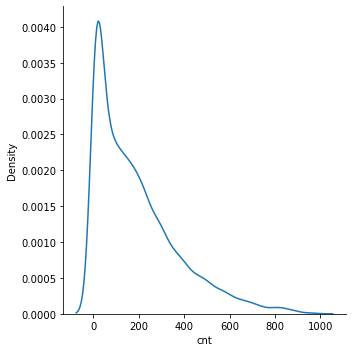

In [8]:
sns.displot(data=bike_data, x="cnt", kind="kde") 

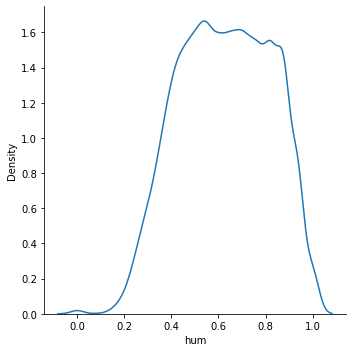

In [9]:

sns.displot(data=bike_data, x="hum", kind="kde")

<AxesSubplot:xlabel='registered', ylabel='Density'>

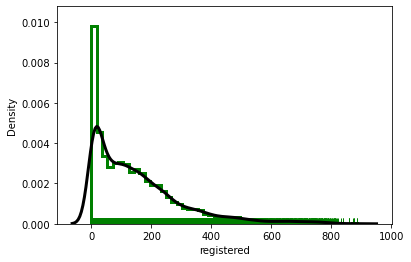

In [10]:
# distplot is like histogram which shows how data is distributed and its density
# here we observe registered rentals plot and its density

sns.distplot(bike_data['registered'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

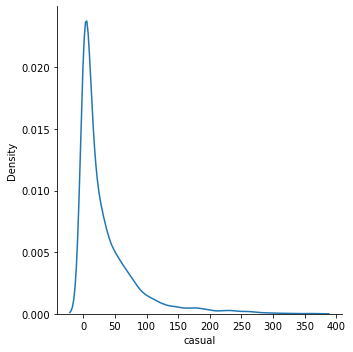

In [11]:
# data is skewed to one side

sns.displot(data=bike_data, x="casual", kind="kde")

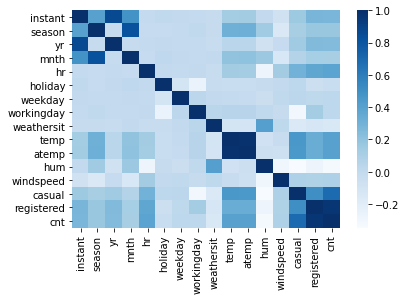

In [12]:
# representation correlation of data 
# here we can get how each column is correlated
# thick color tells us correlated more

sns.heatmap(bike_data.corr(), cmap='Blues');

In [13]:
# this is like help desk where we can get detailed information

help(bike_data.corr())

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index: Union[Collection, NoneType] = None, columns: Union[Collection, NoneType] = None, dtype: Union[ForwardRef('ExtensionDtype'), str, numpy.dtype, Type[Union[str, float, int, complex, bool]], NoneType] = None, copy: bool = False)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects.
 |  
 |      .. versionchanged:: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and 

In [14]:
bike_data.workingday.unique() # checking unique values in workingday column

array([0, 1], dtype=int64)

In [15]:
bike_data.holiday.value_counts() # getting details of number of values separately in holiday column

0    16879
1      500
Name: holiday, dtype: int64

In [16]:
del bike_data['instant'] # removing useless column in data 

In [17]:
bike_data # without the deleted column

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [87]:
# getting out details of count of rentals per hour where rentals are done more than 500 at the particular hour # just change value and check it

(bike_data[bike_data['cnt']>500]['hr']).value_counts() 

17    331
18    270
8     210
19     99
16     73
14     56
13     53
12     53
15     49
7      40
11     34
20      8
22      1
21      1
10      1
Name: hr, dtype: int64

In [19]:
bike_data.season.unique() 

array([1, 2, 3, 4], dtype=int64)

In [20]:
bike_data.dtypes # knowing datatypes of each column

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [21]:
# here we get the count of greater than 100 rentals
# just change the value and check 

(bike_data['cnt']>= 100).value_counts()

True     10369
False     7010
Name: cnt, dtype: int64

In [22]:
# total sum of rentals of count 

bike_data['cnt'].aggregate(sum)

3292679

In [23]:
# here we observe count of first 10 highest rentals with complete details that on which day(date) it is and year, month

bike_data.sort_values([ 'cnt'], ascending= False).head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14964,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14748,2012-09-11,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14725,2012-09-10,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15084,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967
15780,2012-10-24,4,1,10,17,0,3,1,1,0.66,0.6212,0.47,0.0000,87,876,963
10622,2012-03-23,2,1,3,17,0,5,1,2,0.72,0.6515,0.42,0.1642,264,693,957
15108,2012-09-26,4,1,9,17,0,3,1,1,0.74,0.6667,0.48,0.2985,77,876,953
15444,2012-10-10,4,1,10,17,0,3,1,1,0.58,0.5455,0.43,0.2239,91,857,948
15588,2012-10-16,4,1,10,17,0,2,1,1,0.52,0.5000,0.39,0.1940,104,839,943


In [24]:
bike_data.cnt.max() # maximum value of total count of rentals

977

In [25]:
bike_data.cnt.median(), bike_data.cnt.mean() # mean and median of count column

(142.0, 189.46308763450142)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

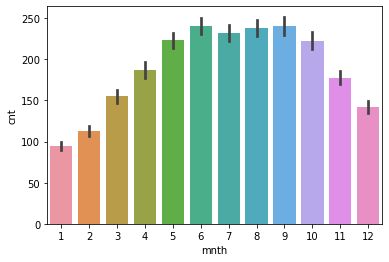

In [26]:
# total count ie,number of total rentals represented month-wise using barplot
# there is a pattern representing that rentals of total count is increasing from jan and decreasing from september that means rentals are depend on seasons, weather, temperature, humidty

sns.barplot(data= bike_data, x='mnth',y='cnt') 

<AxesSubplot:xlabel='mnth', ylabel='registered'>

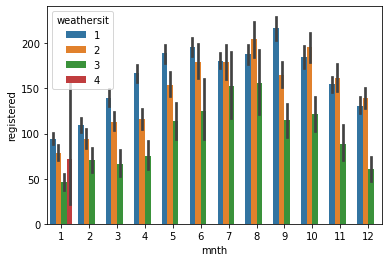

In [27]:
# representation of registered rentals month-wise based on weather

sns.barplot(data= bike_data, y='registered',x='mnth', hue='weathersit')

<AxesSubplot:xlabel='mnth', ylabel='registered'>

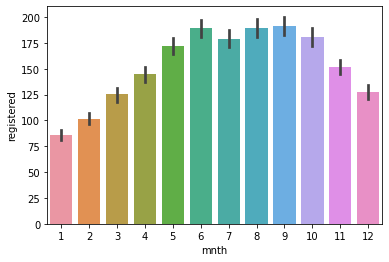

In [28]:
# visualization of number of registered bikes per month
#here gradually registration of bikes are increasing from 1st month but gradually decreasing in 10,11,12 months

sns.barplot(data= bike_data, y='registered',x='mnth')

<AxesSubplot:xlabel='mnth', ylabel='season'>

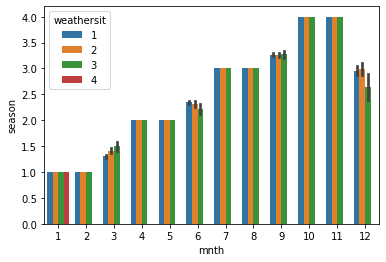

In [29]:
sns.barplot(data= bike_data, y='season',x='mnth', hue='weathersit')

<AxesSubplot:xlabel='hr', ylabel='registered'>

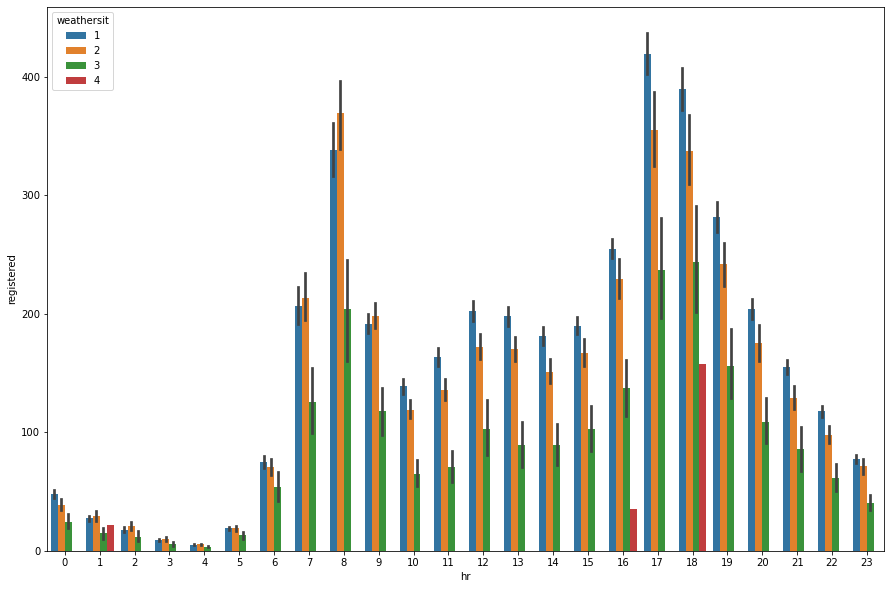

In [30]:
# hour wise rental registrations based on weather data 
# from barplot we can say at morning 7-8 AM and evening 5-6 PM rentals are more than other hours because people who are working or studying taking rentals more at that time

a4_dims = (15,10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(data= bike_data, y='registered',x='hr', hue='weathersit')

<AxesSubplot:xlabel='mnth', ylabel='registered'>

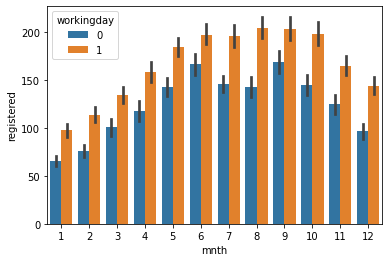

In [31]:
# visualization tells that on workingday bikes are registered more than on a non-working day
# barplot gives the graph of registration of bikes of every month on workingday and non-workingday

sns.barplot(data= bike_data, y='registered',x='mnth', hue='workingday')

<AxesSubplot:xlabel='mnth', ylabel='casual'>

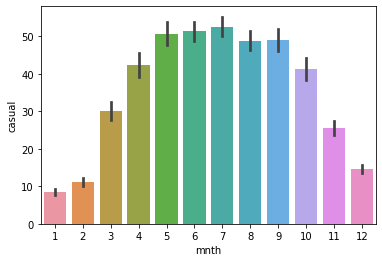

In [32]:
# barplot visualizes number of non-registered (ie, casual rentals) user rental initials of every month
# casual rentals are very less than registrations

sns.barplot(data= bike_data, y='casual',x='mnth')

<AxesSubplot:xlabel='mnth', ylabel='casual'>

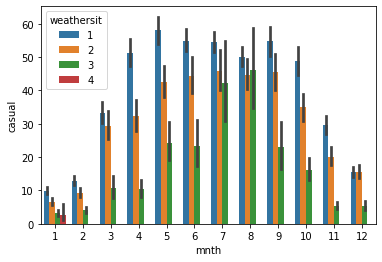

In [33]:
# here from the plot observations casual rentals are made mostly at clear weather, partly cloudy situations and little less at little cloudy+ mist 
# at light snow or light rain rentals are done very very less
# at rainy times no casual rentals are made

sns.barplot(data= bike_data, y='casual',x='mnth', hue='weathersit')

<AxesSubplot:xlabel='hr', ylabel='casual'>

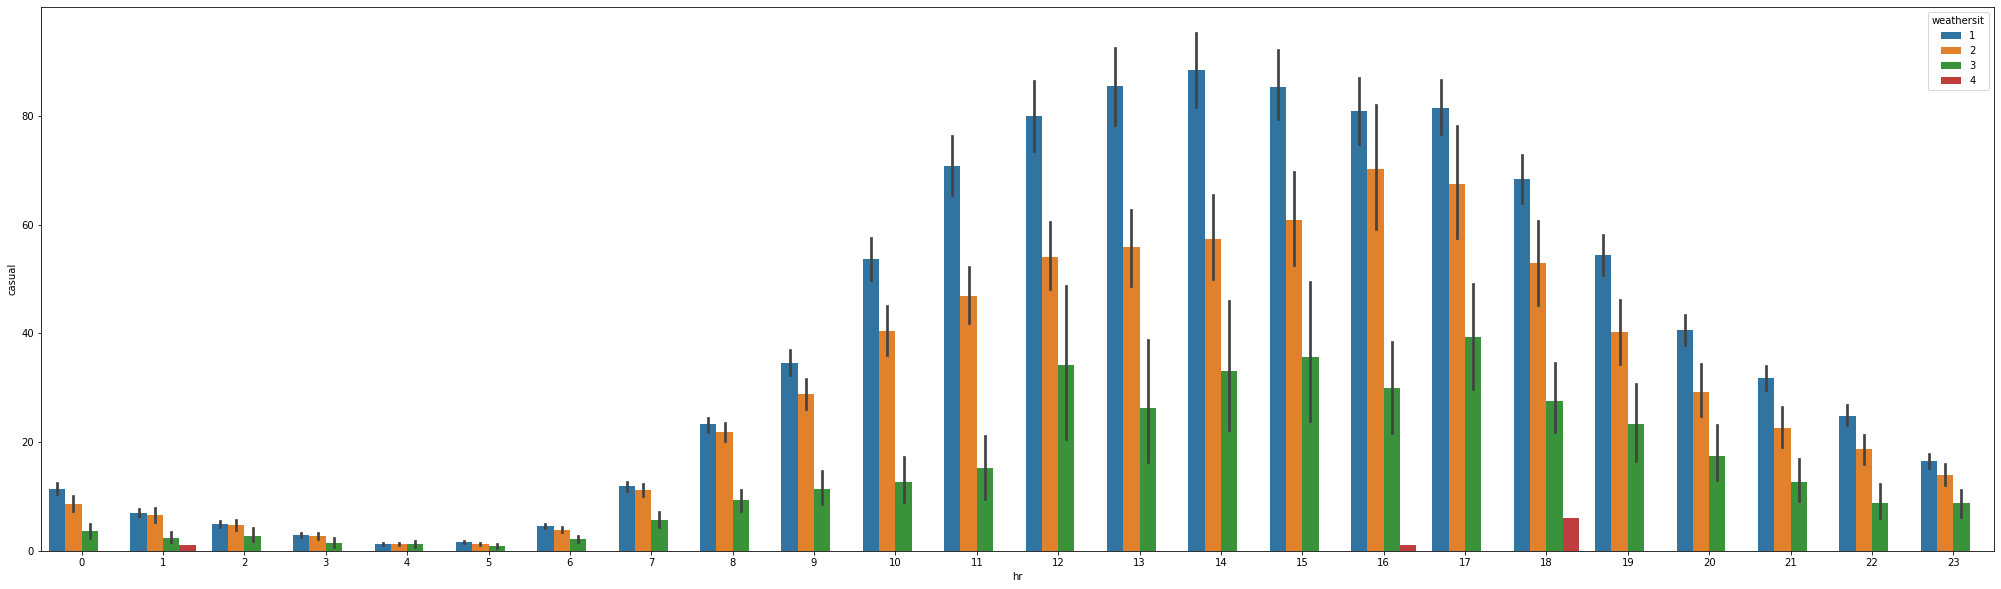

In [34]:
# barplot shows the graph of number of registered bikes for every hour 
# casual rentals are taken mostly at day time 
# at evening snow time casual rentals are taken very very less

a4_dims = (35,10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x='hr',y='casual',hue='weathersit', data= bike_data)

<AxesSubplot:xlabel='hr', ylabel='registered'>

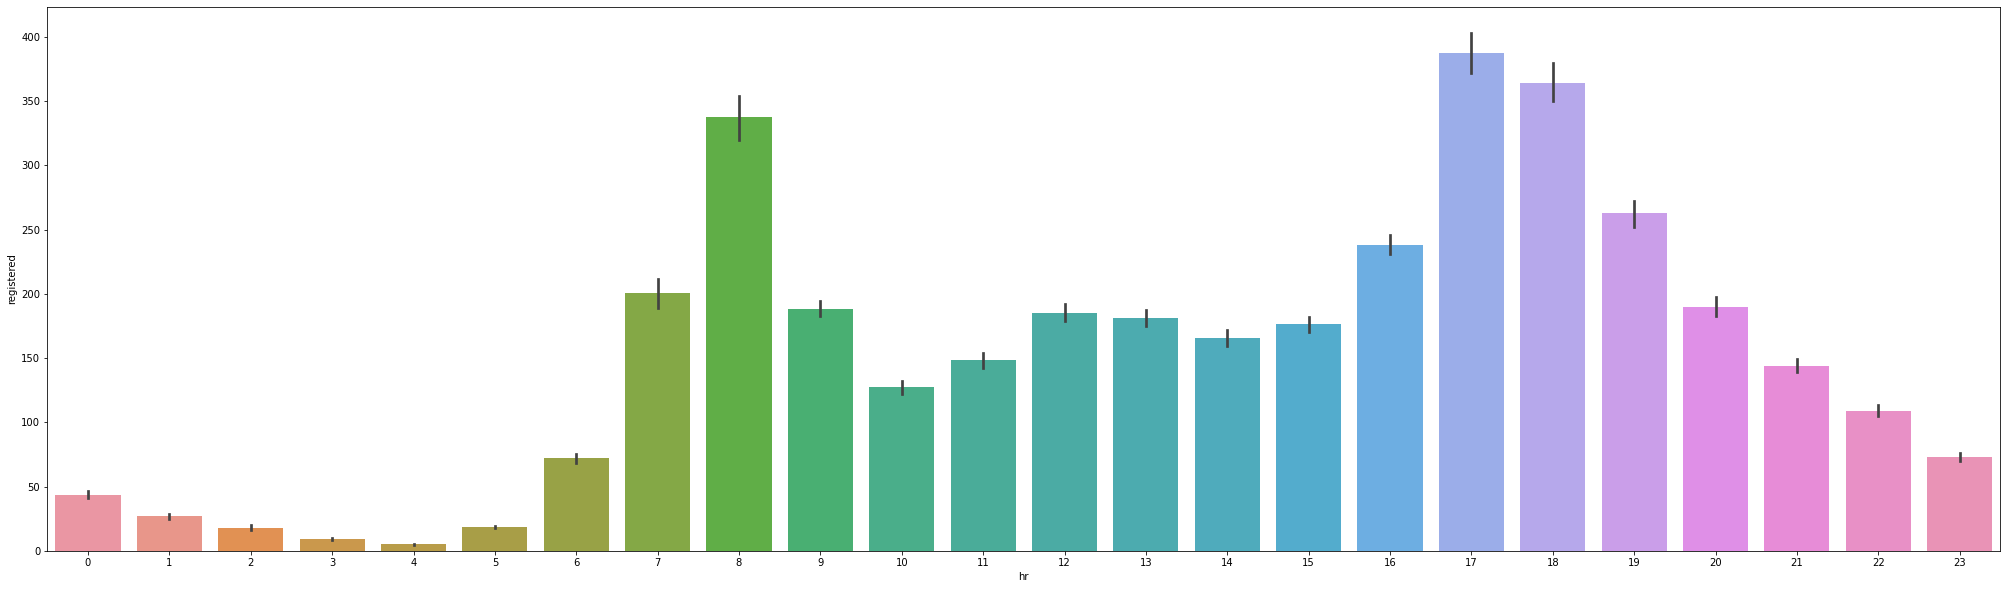

In [35]:
# barplot shows the graph of number of registered bikes for every hour 
# here clearly we can make conclusion that at early morning at 8'O clocl people who are going to offices or educational purpose or any other purpose making more registrations
a4_dims = (35,10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x='hr',y='registered', data= bike_data)

In [36]:
# count of registation of bike rentals for every month

bike_data.groupby(['mnth'])['registered'].count()

mnth
1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
Name: registered, dtype: int64

In [37]:
# count of registation of bike rentals per every hour

bike_data.groupby(['hr'])['registered'].count()

hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: registered, dtype: int64

<AxesSubplot:xlabel='weekday', ylabel='registered'>

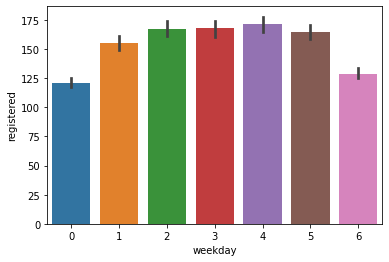

In [38]:
# for registrations of bikes with respect to seasons that registrations are done mostly for weekdays in 3rd season which is fall season
# people are interested to make more rentals at fall season followed by summer and spring seasons W.R.T weekdays

sns.barplot(y='registered', x='weekday' ,data=bike_data)

In [39]:
bike_data.groupby(['weekday'])['cnt'].sum()#.plot(kind='bar')

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

<AxesSubplot:xlabel='mnth', ylabel='registered'>

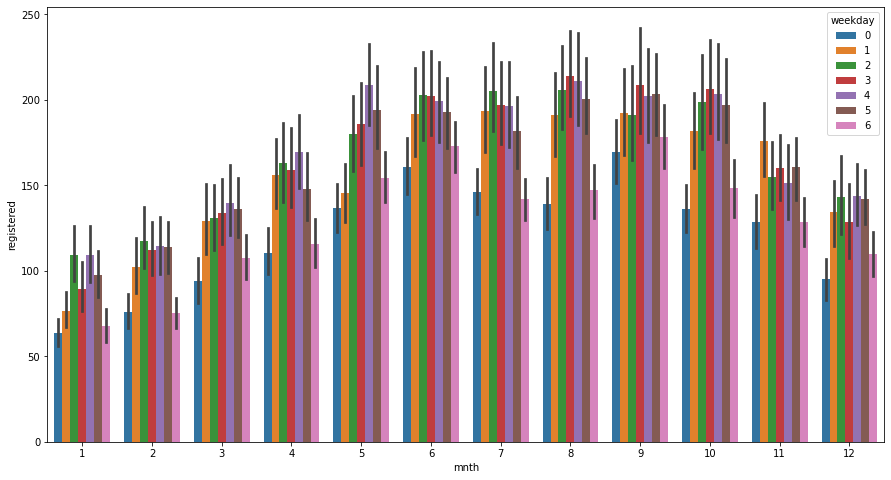

In [40]:
a4_dims = (15,8)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.barplot(y='registered', x='mnth',hue='weekday' ,data=bike_data)

<AxesSubplot:xlabel='mnth', ylabel='casual'>

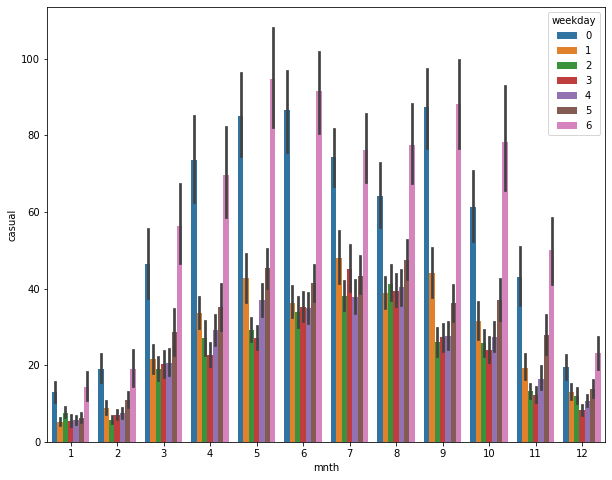

In [41]:
# here from the plots we can conclude that in every month on saturdays and sundays, casual rentals are done more than on working days

a4_dims = (10,8)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.barplot(y='casual', x='mnth',hue='weekday' ,data=bike_data)

<AxesSubplot:xlabel='mnth', ylabel='casual'>

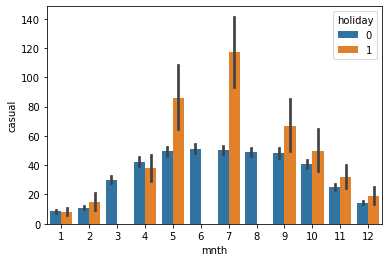

In [42]:
# here from the barplot the casual rentals are done mostly on holiday
# people shows interest to take casual rents on holidays more than on working days

sns.barplot(y='casual', x='mnth',hue='holiday' ,data=bike_data)

<AxesSubplot:xlabel='mnth', ylabel='registered'>

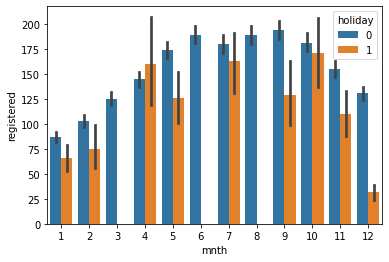

In [43]:
# registeration of bike rentals are very less on holidays with respect to every month

sns.barplot(y='registered', x='mnth',hue='holiday' ,data=bike_data)

<AxesSubplot:xlabel='mnth', ylabel='registered'>

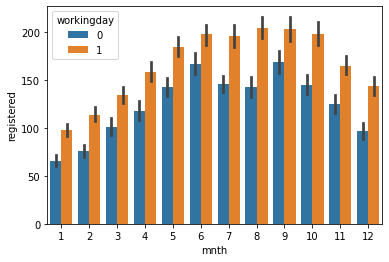

In [44]:
#from registration of rentals on month wise we can say that there is pattern of gradually increasing and decreasing on working days and non-working days
# at mid of the year ie, at summer season and autumn seasons the rentals are more, maybe many factors like wind, cold, humidit, temp..... are influencing the people to rent a bike
sns.barplot(y='registered', x='mnth',hue='workingday' ,data=bike_data)

<AxesSubplot:xlabel='hr', ylabel='registered'>

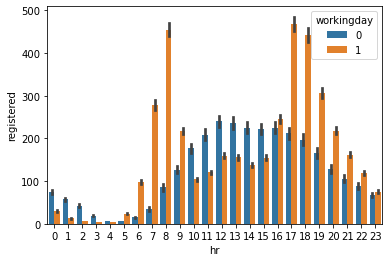

In [45]:
# here from plotting the registration of bikes with respect to every hour on working days we can conclude that at starting to office or to educational instituions at early morning and at the time of leaving the rentals are done more than normal time

sns.barplot(y='registered', x='hr',hue='workingday' ,data=bike_data)

<AxesSubplot:xlabel='mnth', ylabel='count'>

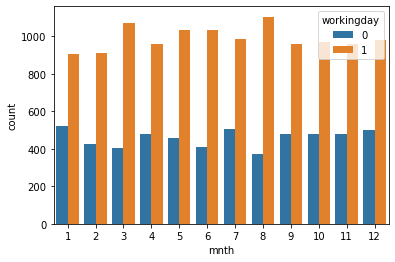

In [46]:
# on workingday the total count of bike rentals are more than on a non-working day
# as of rentals are more on workingday, people are more likely to make registrations or casual rentals on a workingday

sns.countplot(x='mnth',hue='workingday', data=bike_data)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

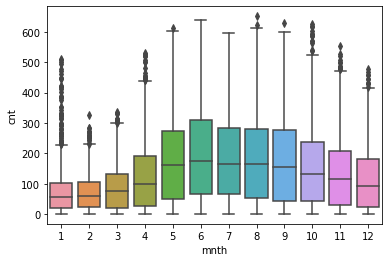

In [47]:
# here we can observe the distribution of total count of bike rentals with respect to every month
# here from the observations of plot the bike rentals are increasing linearly from 3rd month 
# we can aslo conlcude from the observation is rentals are decreasing slowly from 7th month 
# from month wise observations with respect to bike rentals in summer and autumn seasons bikes are rented more than in winter or cold times

sns.boxplot(x='mnth',y='cnt', data=bike_data.head(9000))

<AxesSubplot:xlabel='hr', ylabel='cnt'>

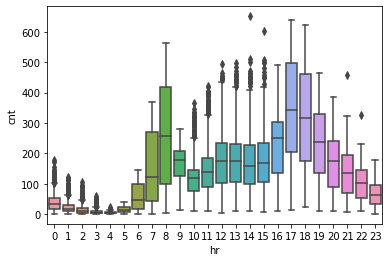

In [48]:
# here we can observe the distribution of total count of bike rentals for 24 hours and outliers are observed after a certain range

sns.boxplot(x='hr',y='cnt', data=bike_data.head(9000))

<AxesSubplot:xlabel='hr', ylabel='casual'>

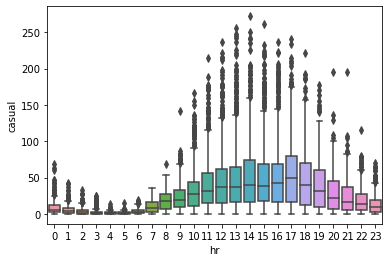

In [49]:
# here we can observe the distribution of casual rentals for 24 hours and outliers are observed after a certain range
sns.boxplot(x='hr',y='casual', data=bike_data.head(9000))

<AxesSubplot:xlabel='mnth', ylabel='registered'>

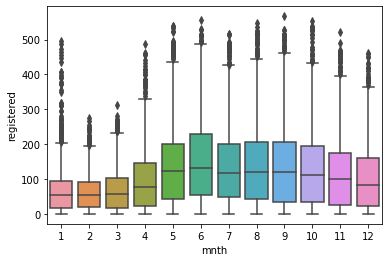

In [50]:
# here the boxplot shows distribution of median of registered values,min&max with respect to month 
# here the outliers represent there are rentals which are higher and far from distribution

sns.boxplot(x='mnth',y='registered', data=bike_data.head(9000))

In [51]:
bike_data.cnt.mean()

189.46308763450142

In [52]:
bike_data.registered.mean()

153.78686920996606

In [53]:
#avg number of non-registered bikes for user rentals
bike_data.casual.mean()

35.67621842453536

In [54]:
# total count of sum of registered and casual bikes
bike_data.cnt.sum()

3292679

In [55]:
#total count of sum of registered bikes

bike_data.registered.sum()

2672662

In [56]:
#total count of sum of non-registered user rental intials

bike_data.casual.sum()

620017

In [57]:
# for easy understanding go for the visualization
# getting the maximum value of total rental counts for each month

bike_data.groupby('mnth')['cnt'].max()#.plot(kind='bar')

mnth
1     559
2     610
3     957
4     822
5     873
6     900
7     913
8     941
9     977
10    963
11    729
12    759
Name: cnt, dtype: int64

In [58]:
bike_data.groupby('mnth')['cnt'].sum()

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

<AxesSubplot:xlabel='hr'>

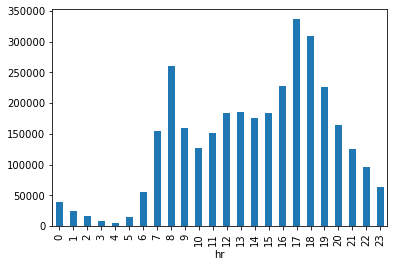

In [59]:
bike_data.groupby('hr')['cnt'].sum().plot(kind='bar')

In [60]:
# we plot the sum of total rentals counts for each season
#check with bargraph for visualization

bike_data.groupby('weathersit')['cnt'].sum()#.plot(kind='bar')

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

In [61]:
# total sum of registered rentals for each hour
# check the plot for visualization

bike_data.groupby('hr')['registered'].sum()#.plot(kind='bar')

hr
0      31755
1      19455
2      12940
3       6281
4       3554
5      13249
6      52115
7     146134
8     245240
9     136980
10     92468
11    108034
12    134696
13    132206
14    120563
15    128543
16    173914
17    282640
18    265276
19    191284
20    138172
21    104875
22     79412
23     52876
Name: registered, dtype: int64

In [62]:
# bar graph representation of minimum temperature(celcius) w.r.t hour 
# there  is a gradual increase in at afternoon and decreasing factor till night
# very minimumm temperature values are recorded at morning and night time

bike_data.groupby('hr')['temp'].min()#.plot(kind='bar')

hr
0     0.04
1     0.04
2     0.02
3     0.02
4     0.02
5     0.02
6     0.02
7     0.02
8     0.02
9     0.04
10    0.04
11    0.06
12    0.06
13    0.08
14    0.10
15    0.12
16    0.12
17    0.12
18    0.08
19    0.08
20    0.06
21    0.06
22    0.06
23    0.04
Name: temp, dtype: float64

In [63]:
# we use barplot because it helps to get clear understanding about temp on hourly based 
# at day time temp is increasing gradually

bike_data.groupby('hr')['temp'].max()#.plot(kind='bar')

hr
0     0.82
1     0.82
2     0.82
3     0.80
4     0.78
5     0.78
6     0.80
7     0.80
8     0.84
9     0.86
10    0.92
11    0.94
12    0.96
13    0.96
14    0.96
15    0.96
16    1.00
17    0.98
18    0.96
19    0.92
20    0.92
21    0.88
22    0.84
23    0.84
Name: temp, dtype: float64

<AxesSubplot:xlabel='season'>

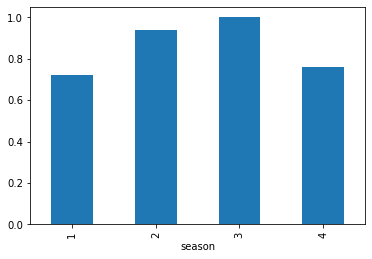

In [64]:
#season 3 which is fall season which had high celcius
# season 2 which is summer season which had slightly high celcius
# season 1 which is spring had low celcius 

bike_data.groupby('season')['temp'].max().plot(kind='bar')

<AxesSubplot:xlabel='mnth'>

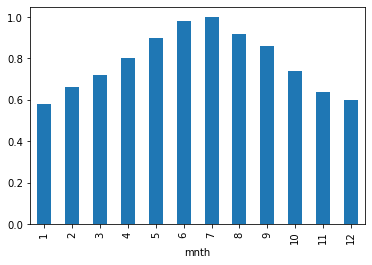

In [65]:
# barplot represents the maximum temperature w.r.t month wise

bike_data.groupby('mnth')['temp'].max().plot(kind='bar')

<AxesSubplot:xlabel='hr'>

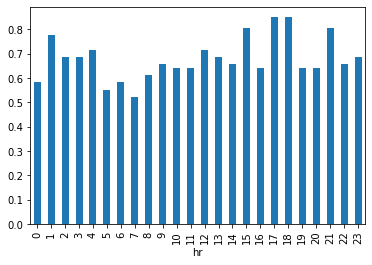

In [66]:
# barplot clearly indicates that night times windspeed is more

bike_data.groupby('hr')['windspeed'].max().plot(kind='bar')

<AxesSubplot:xlabel='season'>

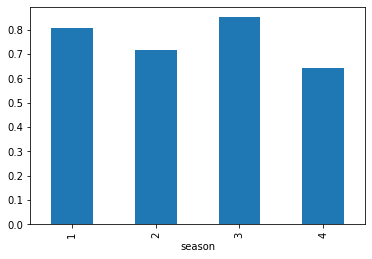

In [67]:
# in fall season and spring season windspeed is more than summer and winter

bike_data.groupby('season')['windspeed'].max().plot(kind='bar')

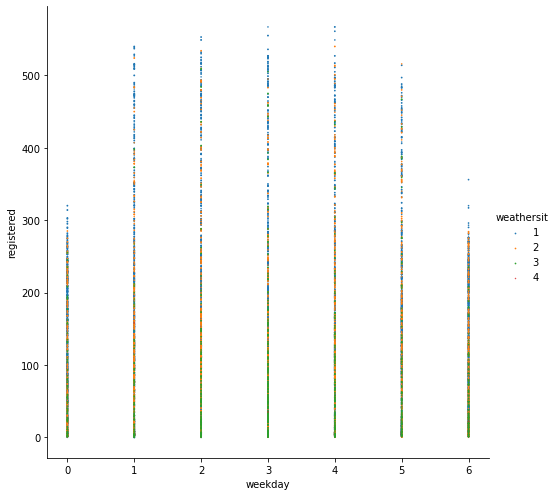

In [68]:
# here we observe the scatter plot for multiple features where hue as weather
sns.FacetGrid(bike_data.head(10000),hue='weathersit', size=7).map(plt.scatter, "weekday", "registered",'temp').add_legend()

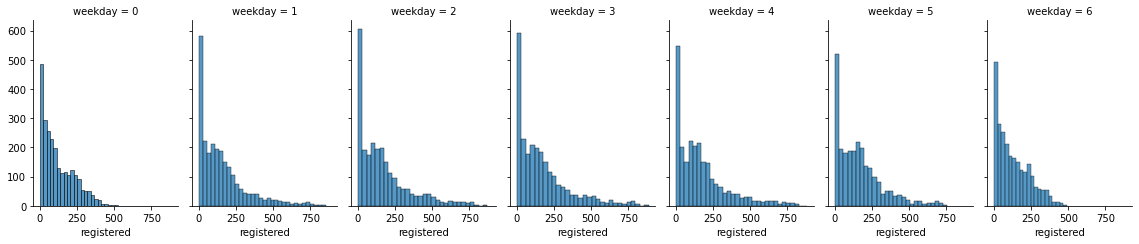

In [69]:
# grid style histogram representation for weekday w.r.t registered rentals

k=sns.FacetGrid(bike_data, col='weekday', height=3.5, aspect=.65)
k.map(sns.histplot,'registered')

<AxesSubplot:xlabel='mnth'>

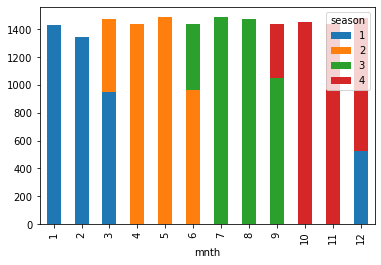

In [70]:
pd.crosstab(bike_data.mnth,bike_data.season, values=bike_data.cnt, aggfunc='count').plot(kind='bar', stacked= True)

<AxesSubplot:xlabel='hr'>

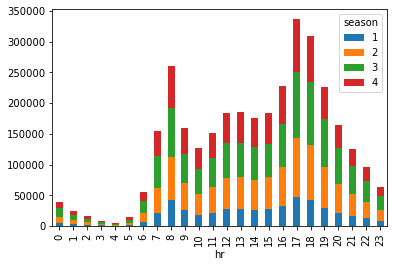

In [71]:
pd.crosstab(bike_data.hr,bike_data.season, values=bike_data.cnt, aggfunc='sum').plot(kind='bar', stacked= True)

<AxesSubplot:xlabel='mnth'>

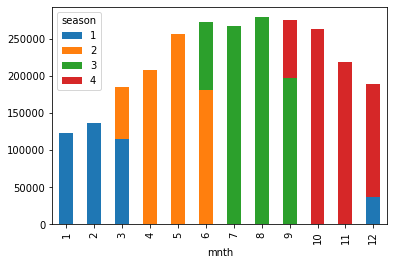

In [72]:
pd.crosstab(bike_data.mnth,bike_data.season, values=bike_data.registered, aggfunc='sum').plot(kind='bar', stacked= True)

<AxesSubplot:xlabel='mnth'>

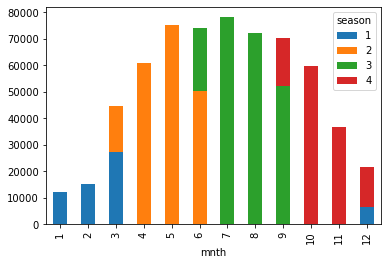

In [73]:
pd.crosstab(bike_data.mnth,bike_data.season, values=bike_data.casual, aggfunc='sum').plot(kind='bar', stacked= True)

In [74]:
bike_data.groupby('hr').mean()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
hr,,,,,,,,,,,,,,
0,2.500000,0.502755,6.534435,0.028926,3.004132,0.683196,1.398072,0.467410,0.451105,0.691019,0.161758,10.158402,43.739669,53.898072
1,2.497238,0.502762,6.526243,0.029006,3.008287,0.682320,1.400552,0.459365,0.443289,0.704213,0.158659,6.504144,26.871547,33.375691
2,2.511888,0.507692,6.567832,0.029371,3.027972,0.681119,1.409790,0.454573,0.439184,0.716825,0.154519,4.772028,18.097902,22.869930
3,2.539455,0.509326,6.645624,0.025825,3.027260,0.674319,1.424677,0.453113,0.438396,0.729785,0.150929,2.715925,9.011478,11.727403
4,2.552367,0.516499,6.664275,0.028694,3.011478,0.674319,1.426112,0.446628,0.432549,0.742367,0.155813,1.253945,5.098996,6.352941
5,2.513250,0.507671,6.581590,0.029289,3.023710,0.690377,1.422594,0.436123,0.423145,0.742929,0.150342,1.411437,18.478382,19.889819
6,2.497931,0.502069,6.531034,0.028966,3.009655,0.684138,1.451034,0.432469,0.419376,0.744179,0.157722,4.161379,71.882759,76.044138
7,2.496561,0.500688,6.525447,0.028886,3.001376,0.682256,1.486933,0.439092,0.425557,0.730908,0.163916,11.055021,201.009629,212.064649
8,2.496561,0.500688,6.525447,0.028886,3.001376,0.682256,1.474553,0.454993,0.440272,0.702682,0.176563,21.679505,337.331499,359.011004


In [75]:
# total casual rentals are summed w.r.t weather 
# 1.clear sky and partly cloudy casual rentals are done more
# 2.when cloudy and mist casual rentals are slightly less
# 4. very less casual rentals ie,8 are taken due to snow
# the numbers here shows that people are interested to take casual rentals more at clear sky and slightly less casual rentals at patly cloudy

bike_data.groupby('weathersit')['casual'].sum()#.plot(kind='bar')

weathersit
1    462745
2    134481
3     22783
4         8
Name: casual, dtype: int64

In [76]:
#total sum of registered rentals according to the weather
# from this we get at what kind of weather people are using registered rentals

bike_data.groupby('weathersit')['registered'].sum()#.plot(kind='bar')

weathersit
1    1875428
2     661471
3     135548
4        215
Name: registered, dtype: int64

<AxesSubplot:xlabel='hr'>

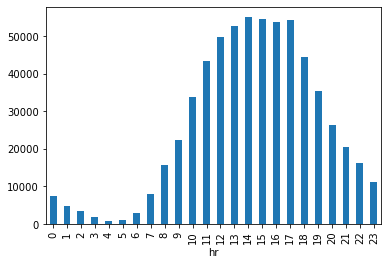

In [77]:
# total sum of casual rentals for each hour
# visualize it for better view
# at day tym casual rentals are done more than night
# rentals are based on works, holidays, weather, temperature
# after 5 pm clock casual rentals are decreasing

bike_data.groupby('hr')['casual'].sum().plot(kind='bar')

In [78]:
# total sum of count of bike rentals for each season
# in season 3 count is more, where season 3 is fall season

bike_data.groupby('season')['cnt'].sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

In [79]:
#convert dteday clumn which is in int type to datetime object 

bike_data['dteday'] =pd.to_datetime(bike_data['dteday'])

In [80]:
# day, month, year are separated from dateday column and new columns are created for it 

bike_data['year'] = bike_data['dteday'].dt.year

#bike_data['month'] = bike_data['dteday'].dt.month # here month already given

bike_data['day'] = bike_data['dteday'].dt.day

bike_data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,day
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011,1
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011,1
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011,1
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011,1
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012,31
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012,31
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012,31
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,2012,31


In [81]:
bike_data.groupby(['year'])['cnt'].sum() # total sum of bike rentals of count for each year

year
2011    1243103
2012    2049576
Name: cnt, dtype: int64

<AxesSubplot:xlabel='weekday'>

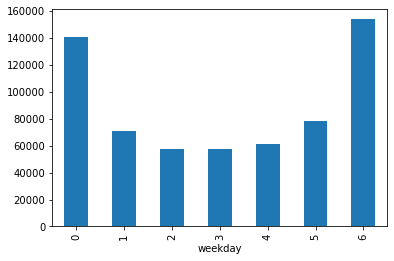

In [82]:
# casual rentals are used mostly on monday and sunday, very less on working days
# cosider 0 as monday for start of the week...

bike_data.groupby(['weekday'])['casual'].sum().plot(kind='bar')

<AxesSubplot:xlabel='weekday'>

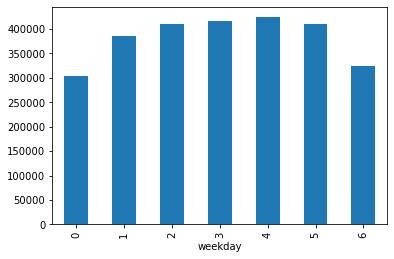

In [83]:
# registered rental bikes are used mostly on workindays, that means people are registering bikes for their works

bike_data.groupby(['weekday'])['registered'].sum().plot(kind='bar')